In [3]:
from google.colab import files
import pandas as pd
import io

uploaded=files.upload()

Saving credit_card_transactions.csv to credit_card_transactions.csv


In [4]:
df=pd.read_csv(io.BytesIO(uploaded['credit_card_transactions.csv']))
df

,Transaction_ID,Customer_ID,Transaction_Amount,Transaction_Time,Merchant_Category,Transaction_Location,Card_Type,Device_Type,Is_Fraud
0,T100000,C5292,215.55,17-05-25 21:59,Restaurants,Ericatown,Prepaid,Mobile,0
1,T100001,C6017,31.65,14-08-25 09:46,Clothing,Robertsonville,Debit,POS,0
2,T100002,C3972,170.38,22-06-25 02:13,Travel,Hendersonberg,Credit,POS,1
3,T100003,C3521,310.73,30-06-25 22:21,Clothing,Lopezshire,Debit,POS,0
4,T100004,C4861,80.98,10-06-25 11:47,Restaurants,Marisabury,Debit,Web,0
...,...,...,...,...,...,...,...,...,...
9995,T109995,C6051,349.40,28-05-25 14:44,Travel,Martinton,Credit,Web,0
9996,T109996,C8210,517.69,06-02-25 18:33,Restaurants,Lake Joseph,Debit,Web,0
9997,T109997,C5084,248.39,28-01-25 21:00,Entertainment,East Sherry,Credit,Mobile,0
9998,T109998,C5778,137.94,21-06-25 08:12,Clothing,Johnsonstad,Debit,POS,0


In [5]:
df.describe()

,Transaction_Amount,Is_Fraud
count,10000.000000,10000.000000
mean,299.558401,0.025000
std,151.799157,0.156133
min,2.760000,0.000000
25%,173.402500,0.000000
50%,297.995000,0.000000
75%,423.972500,0.000000
max,889.640000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Transaction_ID        10000 non-null  object 
 1   Customer_ID           10000 non-null  object 
 2   Transaction_Amount    10000 non-null  float64
 3   Transaction_Time      10000 non-null  object 
 4   Merchant_Category     10000 non-null  object 
 5   Transaction_Location  10000 non-null  object 
 6   Card_Type             10000 non-null  object 
 7   Device_Type           10000 non-null  object 
 8   Is_Fraud              10000 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 703.3+ KB


In [7]:
df.head()

,Transaction_ID,Customer_ID,Transaction_Amount,Transaction_Time,Merchant_Category,Transaction_Location,Card_Type,Device_Type,Is_Fraud
0,T100000,C5292,215.55,17-05-25 21:59,Restaurants,Ericatown,Prepaid,Mobile,0
1,T100001,C6017,31.65,14-08-25 09:46,Clothing,Robertsonville,Debit,POS,0
2,T100002,C3972,170.38,22-06-25 02:13,Travel,Hendersonberg,Credit,POS,1
3,T100003,C3521,310.73,30-06-25 22:21,Clothing,Lopezshire,Debit,POS,0
4,T100004,C4861,80.98,10-06-25 11:47,Restaurants,Marisabury,Debit,Web,0


In [8]:
n=pd.unique(df['Is_Fraud'])
n

array([0, 1])

In [9]:
s=pd.value_counts(df['Is_Fraud'])
s

/tmp/ipython-input-3213676657.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  s=pd.value_counts(df['Is_Fraud'])


,count
Is_Fraud,
0,9750
1,250


In [14]:
import matplotlib.pyplot as plt

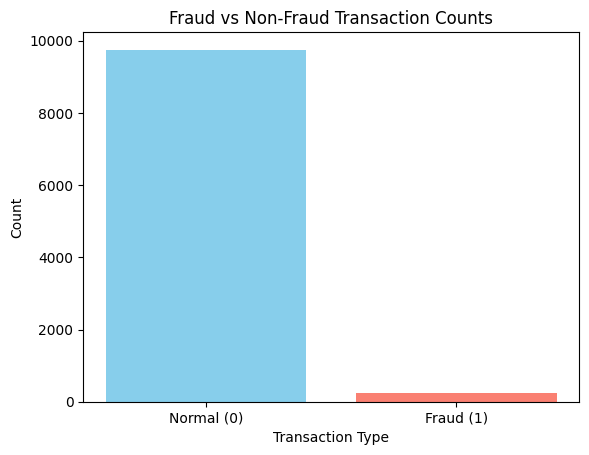

In [15]:
plt.bar(s.index, s.values, color=['skyblue', 'salmon'])
plt.xticks([0, 1], ["Normal (0)", "Fraud (1)"])
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Fraud vs Non-Fraud Transaction Counts")
plt.show()

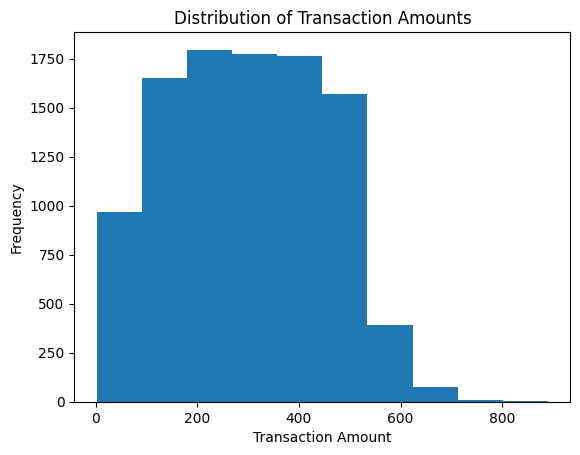

In [16]:
plt.hist(df['Transaction_Amount'])
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')
plt.show()

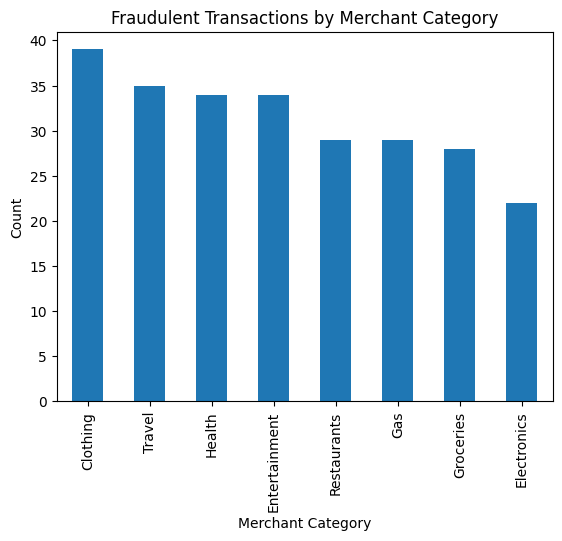

In [18]:
fraud_data=df[df['Is_Fraud']==1]
fraud_categories=fraud_data['Merchant_Category'].value_counts()
fraud_categories.plot(kind='bar')
plt.xlabel('Merchant Category')
plt.ylabel('Count')
plt.title('Fraudulent Transactions by Merchant Category')
plt.show()

In [19]:
a=df[df['Is_Fraud']==1]
b=df[df['Is_Fraud']==0]
a.describe()

,Transaction_Amount,Is_Fraud
count,250.000000,250.0
mean,287.718600,1.0
std,159.067616,0.0
min,11.110000,1.0
25%,156.617500,1.0
50%,270.435000,1.0
75%,410.742500,1.0
max,719.430000,1.0


In [20]:
b.describe()

,Transaction_Amount,Is_Fraud
count,9750.000000,9750.0
mean,299.861986,0.0
std,151.604585,0.0
min,2.760000,0.0
25%,173.607500,0.0
50%,298.735000,0.0
75%,424.307500,0.0
max,889.640000,0.0


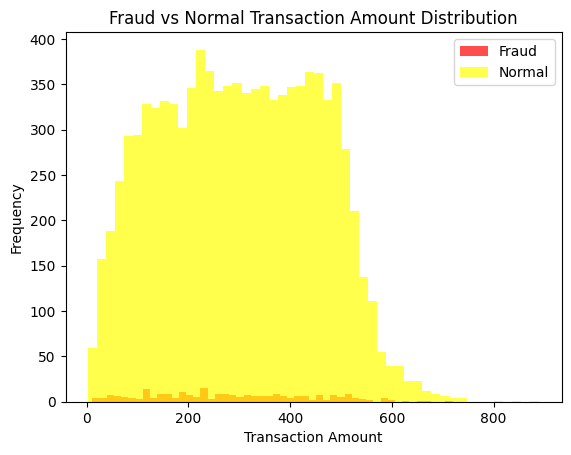

In [21]:
a['Transaction_Amount'].plot(kind="hist", bins=50, alpha=0.7, color='red', label='Fraud')
b['Transaction_Amount'].plot(kind="hist", bins=50, alpha=0.7, color='yellow', label='Normal')
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title("Fraud vs Normal Transaction Amount Distribution")
plt.legend()
plt.show()

In [22]:
import datetime as dt
datetime1=pd.to_datetime(df['Transaction_Time'])
Hour_data=datetime1.dt.hour
Hour_data

/tmp/ipython-input-4127234536.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime1=pd.to_datetime(df['Transaction_Time'])


,Transaction_Time
0,21
1,9
2,2
3,22
4,11
...,...
9995,14
9996,18
9997,21
9998,8


In [23]:
df['Hour_data']=Hour_data
df

,Transaction_ID,Customer_ID,Transaction_Amount,Transaction_Time,Merchant_Category,Transaction_Location,Card_Type,Device_Type,Is_Fraud,Hour_data
0,T100000,C5292,215.55,17-05-25 21:59,Restaurants,Ericatown,Prepaid,Mobile,0,21
1,T100001,C6017,31.65,14-08-25 09:46,Clothing,Robertsonville,Debit,POS,0,9
2,T100002,C3972,170.38,22-06-25 02:13,Travel,Hendersonberg,Credit,POS,1,2
3,T100003,C3521,310.73,30-06-25 22:21,Clothing,Lopezshire,Debit,POS,0,22
4,T100004,C4861,80.98,10-06-25 11:47,Restaurants,Marisabury,Debit,Web,0,11
...,...,...,...,...,...,...,...,...,...,...
9995,T109995,C6051,349.40,28-05-25 14:44,Travel,Martinton,Credit,Web,0,14
9996,T109996,C8210,517.69,06-02-25 18:33,Restaurants,Lake Joseph,Debit,Web,0,18
9997,T109997,C5084,248.39,28-01-25 21:00,Entertainment,East Sherry,Credit,Mobile,0,21
9998,T109998,C5778,137.94,21-06-25 08:12,Clothing,Johnsonstad,Debit,POS,0,8


In [24]:
x=df.groupby(['Hour_data','Is_Fraud']).size()
x

Hour_data  Is_Fraud
0          0           408
           1            11
1          0           389
           1            11
2          0           408
           1             7
3          0           407
           1            13
4          0           400
           1             6
5          0           452
           1            13
6          0           388
           1            15
7          0           404
           1            13
8          0           390
           1             8
9          0           400
           1             6
10         0           426
           1             8
11         0           409
           1             6
12         0           381
           1            11
13         0           413
           1            13
14         0           431
           1             8
15         0           399
           1            10
16         0           407
           1            14
17         0           416
           1             5
18         0           380
           1             5
19         0           425
           1            11
20         0           412
           1            14
21         0           382
           1            17
22         0           388
           1            15
23         0           435
           1            10
dtype: int64

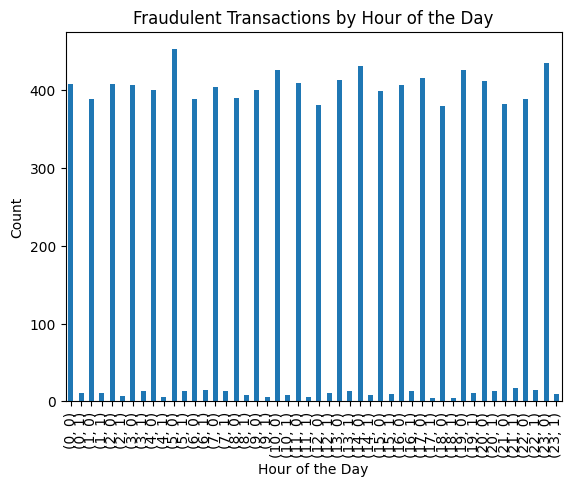

In [25]:
x=df.groupby(['Hour_data','Is_Fraud']).size()
x.plot(kind="bar")
plt.xlabel("Hour of the Day")
plt.ylabel("Count")
plt.title("Fraudulent Transactions by Hour of the Day")
plt.show()

In [33]:
q=df['Merchant_Category'].value_counts()
q

,count
Merchant_Category,
Entertainment,1330
Restaurants,1282
Clothing,1280
Groceries,1257
Electronics,1233
Health,1227
Gas,1219
Travel,1172


In [32]:
r=df[df['Is_Fraud']==1]['Merchant_Category'].value_counts()
r

,count
Merchant_Category,
Clothing,39
Travel,35
Health,34
Entertainment,34
Restaurants,29
Gas,29
Groceries,28
Electronics,22


In [31]:
t=df[df['Is_Fraud']==1]['Transaction_Location'].value_counts()
w=t.head()
w

,count
Transaction_Location,
North Michael,2
North Erica,1
North Natalie,1
Markmouth,1
Port Erin,1


In [37]:
df.groupby(['Merchant_Category','Is_Fraud']).size().unstack()

Is_Fraud,0,1
Merchant_Category,,
Clothing,1241,39
Electronics,1211,22
Entertainment,1296,34
Gas,1190,29
Groceries,1229,28
Health,1193,34
Restaurants,1253,29
Travel,1137,35


In [40]:
df.groupby(['Transaction_Location','Is_Fraud']).size().unstack()

Is_Fraud,0,1
Transaction_Location,,
Aaronberg,1.0,NaN
Aaronhaven,2.0,NaN
Aaronmouth,1.0,NaN
Aaronshire,1.0,NaN
Aarontown,1.0,NaN
...,...,...
Zunigamouth,1.0,NaN
Zunigaport,1.0,NaN
Zunigastad,1.0,NaN


In [41]:
transaction_counts=pd.crosstab(df['Card_Type'],df['Device_Type'])
transaction_counts

Device_Type,Mobile,POS,Web
Card_Type,,,
Credit,1099,1139,1069
Debit,1089,1110,1124
Prepaid,1111,1165,1094


In [43]:
fraud_percentage = pd.crosstab(
    df['Card_Type'],
    df['Device_Type'],
    values=df['Is_Fraud'],
    aggfunc='sum',
    normalize='index'
)
fraud_percentage=fraud_percentage*100
fraud_percentage

Device_Type,Mobile,POS,Web
Card_Type,,,
Credit,37.647059,31.764706,30.588235
Debit,33.766234,28.571429,37.662338
Prepaid,35.227273,29.545455,35.227273
